PROBLEM STATEMENT

Datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
The data contains only numerical input variables which are the result of a PCA transformation.
Input Features: V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 
Output: 1 in case of fraud and 0 otherwise.

Data Set Link - https://www.kaggle.com/mlg-ulb/creditcardfraud/home

Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import The Dataset
creditcard_df = pd.read_csv("creditcard.csv")

In [3]:
creditcard_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
creditcard_df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
creditcard_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
creditcard_df.info()
#Fortunately the dataset does not have any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

# Data Visualization

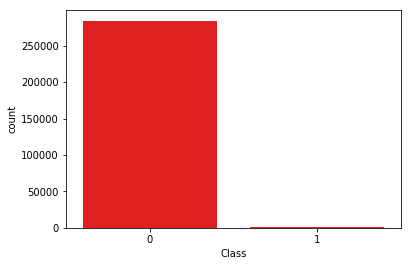

In [7]:
#Plot to show Fraud and No-fraud records
sns.countplot(creditcard_df['Class'], label = "Count" , color = 'red' ) 


From the above plot we can see that the data is extremply unbalanced

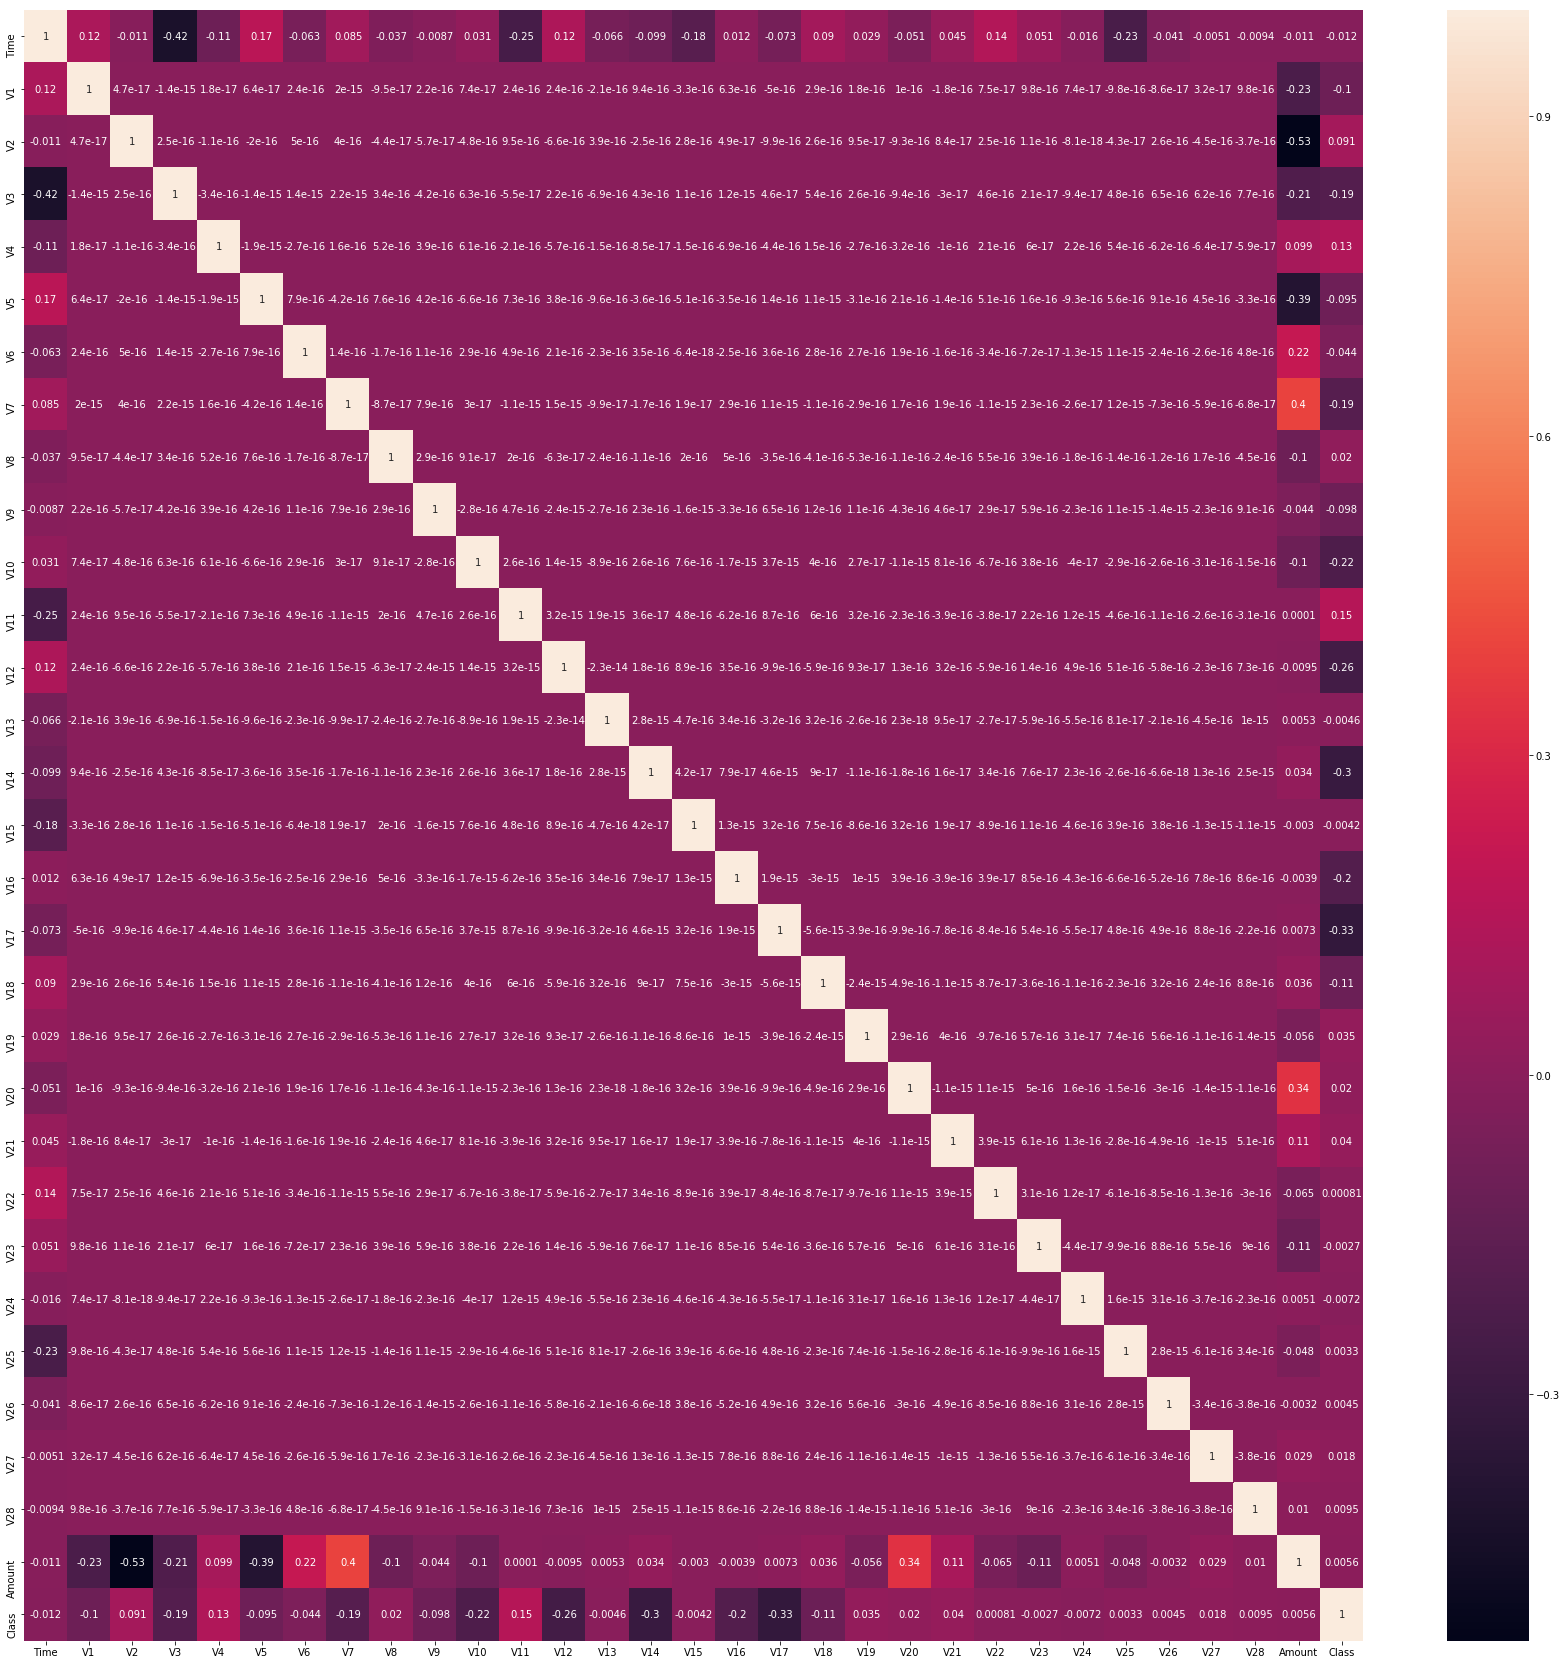

In [8]:
#Correlation Plot between variables
plt.figure(figsize=(30,30)) 
sns.heatmap(creditcard_df.corr(), annot=True ) 


We can see that allost all the variables are uncorrelated. 
This can be because they are all derived through PCA analysis. 

In [18]:
non_fraud = creditcard_df[creditcard_df['Class']==0]

In [15]:
fraud = creditcard_df[creditcard_df['Class']==1]

In [16]:
column_headers = creditcard_df.columns.values

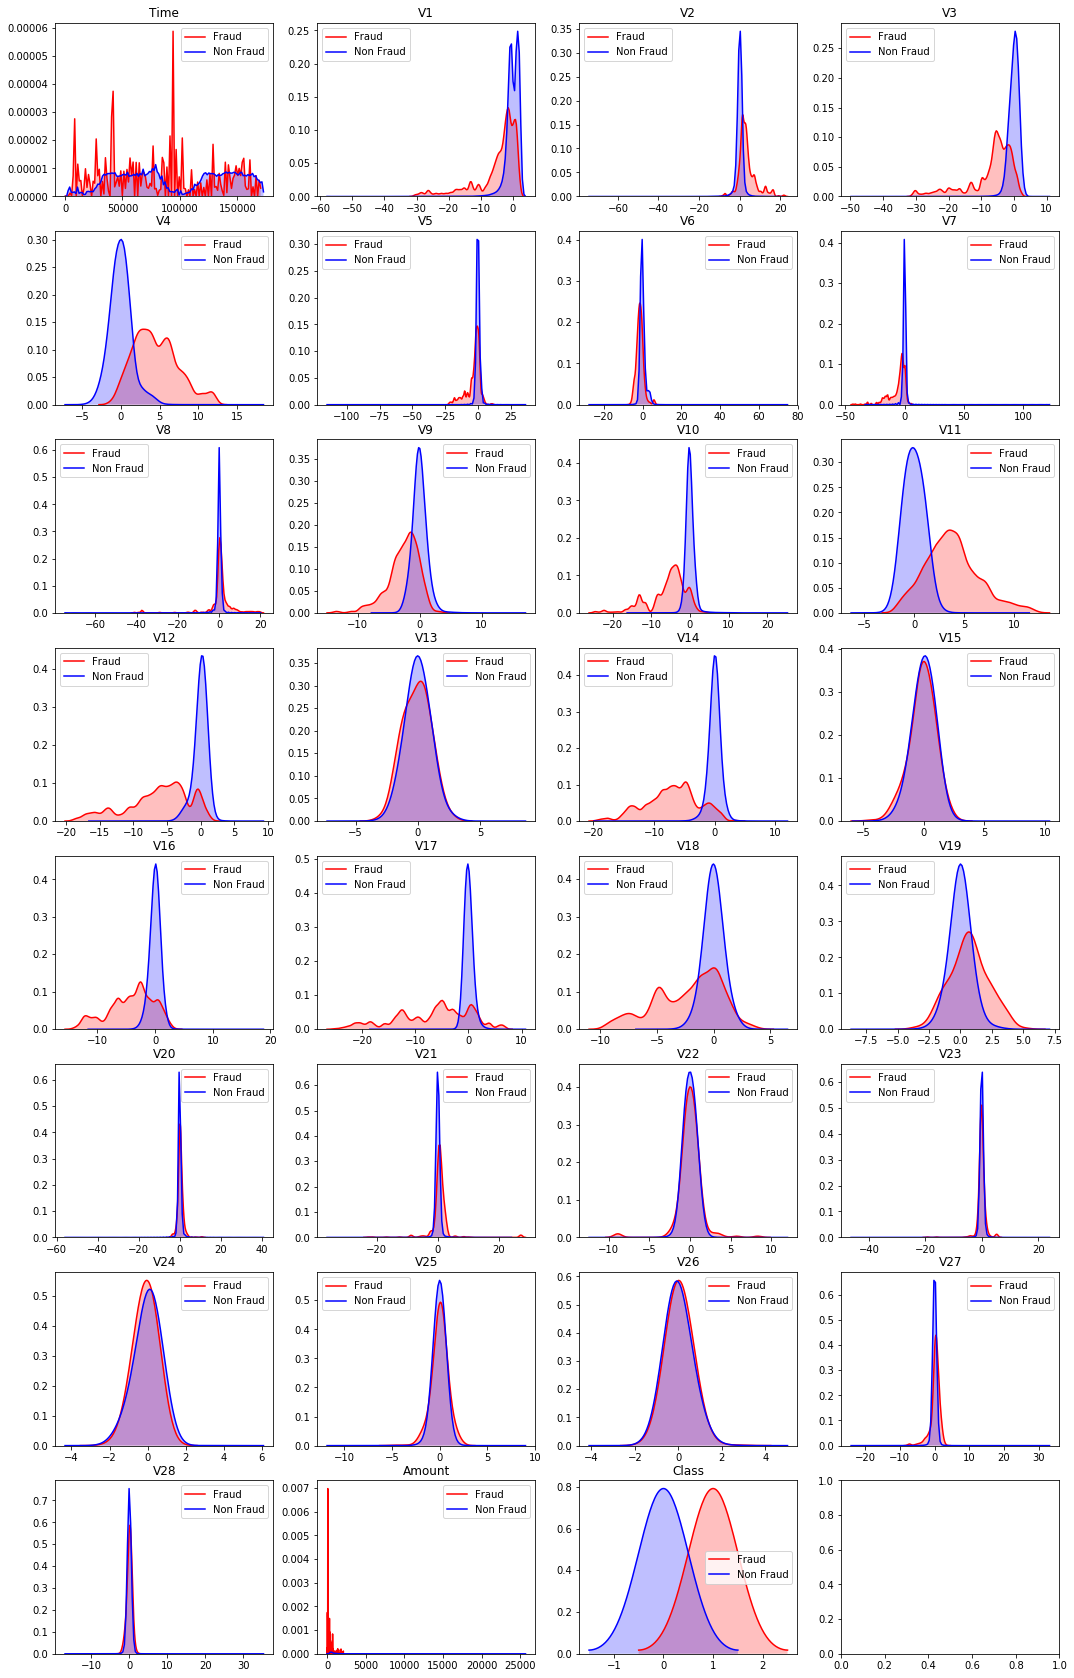

In [19]:
# kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable.
i = 1

fig, ax = plt.subplots(8,4,figsize=(18,30))
for column_header in column_headers:    
    plt.subplot(8,4,i)
    sns.kdeplot(fraud[column_header], bw = 0.5, label = "Fraud", shade=True, color="r")
    sns.kdeplot(non_fraud[column_header], bw = 0.5, label = "Non Fraud", shade=True, color= "b")
    plt.title(column_header, fontsize=12)
    i = i + 1
plt.show();

# Testing and Training dataset creation

In [20]:
#Amonnt column needs to be scaled to the range -1 to 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
creditcard_df['Amount_Norm'] = sc.fit_transform(creditcard_df['Amount'].values.reshape(-1,1))

In [21]:
creditcard_df = creditcard_df.drop(['Amount'], axis = 1)

In [22]:
# Drop the target label coloumns
X = creditcard_df.drop(['Class'],axis=1)
y = creditcard_df['Class']

In [23]:
X.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Norm
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [24]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [25]:
#Split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Training the model

In [26]:
from sklearn.naive_bayes import GaussianNB 
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# Model Evaluation

In [27]:
from sklearn.metrics import classification_report, confusion_matrix


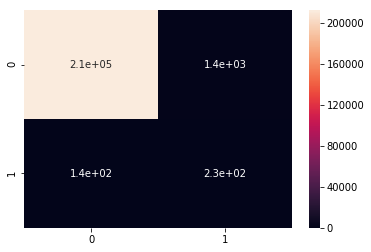

In [28]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

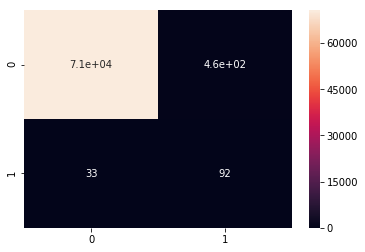

In [29]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [30]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71077
           1       0.17      0.74      0.27       125

   micro avg       0.99      0.99      0.99     71202
   macro avg       0.58      0.86      0.63     71202
weighted avg       1.00      0.99      1.00     71202



# Model improvement

In [31]:
#Based on the visuals from the kernel density function we can remove the below columns since they dont give much information or value to the model.
X = creditcard_df.drop(['Time','V8','V13','V15','V20','V22','V23','V24','V25','V26','V27','V28','Class'], axis = 1)

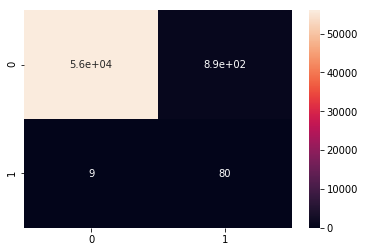

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)
y_predict = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [33]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56873
           1       0.08      0.90      0.15        89

   micro avg       0.98      0.98      0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962



In [34]:
fraud = creditcard_df[creditcard_df['Class']==1]

In [35]:
fraud.count()

Time           492
V1             492
V2             492
V3             492
V4             492
V5             492
V6             492
V7             492
V8             492
V9             492
V10            492
V11            492
V12            492
V13            492
V14            492
V15            492
V16            492
V17            492
V18            492
V19            492
V20            492
V21            492
V22            492
V23            492
V24            492
V25            492
V26            492
V27            492
V28            492
Class          492
Amount_Norm    492
dtype: int64

In [36]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train, y_train)

C:\Users\Arjun Achuthan\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

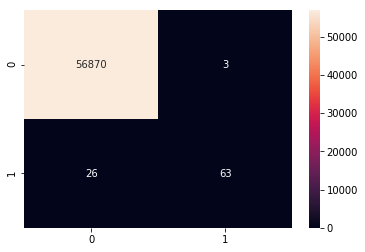

In [37]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

In [38]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.95      0.71      0.81        89

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.98      0.85      0.91     56962
weighted avg       1.00      1.00      1.00     56962



From the above we can see that SVM model shows better results than the Naive BiaS model